First I will load in the dataset

In [1]:
import pandas as pd

file = "steel.csv"
df = pd.read_csv(file)

df.head(), df.shape

(   normalising_temperature  tempering_temperature  percent_silicon  \
 0                  178.500                    275           0.1530   
 1                  178.500                    950           0.1530   
 2                  178.500                    375           0.1530   
 3                  178.500                    900           0.1530   
 4                  189.525                    900           0.1624   
 
    percent_chromium  percent_copper  percent_nickel  percent_sulphur  \
 0          0.970575           0.942          0.8870              0.0   
 1          1.212726           0.942          0.8870              0.0   
 2          1.621165           0.942          0.8870              0.0   
 3          0.809989           0.942          0.8870              0.0   
 4          1.036229           0.849          0.9382              0.0   
 
    percent_carbon  percent_manganese  tensile_strength  
 0           1.920                0.0         25.107613  
 1           1.9

In [2]:
# select independent and dependent variables
dependent_col = "tensile_strength"
independent_cols = [col for col in df.columns if col != dependent_col]

X = df[independent_cols]
y = df[dependent_col]

X.head(), y.head(), X.shape, y.shape

(   normalising_temperature  tempering_temperature  percent_silicon  \
 0                  178.500                    275           0.1530   
 1                  178.500                    950           0.1530   
 2                  178.500                    375           0.1530   
 3                  178.500                    900           0.1530   
 4                  189.525                    900           0.1624   
 
    percent_chromium  percent_copper  percent_nickel  percent_sulphur  \
 0          0.970575           0.942          0.8870              0.0   
 1          1.212726           0.942          0.8870              0.0   
 2          1.621165           0.942          0.8870              0.0   
 3          0.809989           0.942          0.8870              0.0   
 4          1.036229           0.849          0.9382              0.0   
 
    percent_carbon  percent_manganese  
 0           1.920                0.0  
 1           1.920                0.0  
 2          

In [ ]:
# set up evaluation metrics

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
# implementing 10 fold cross validation
from sklearn.model_selection import KFold

def evaluate_model(model,X,Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_list = []
    r2_list = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse_list.append(rmse(y_test, y_pred))
        r2_list.append(r2_score(y_test, y_pred))
    
    avg_rmse = np.mean(rmse_list)
    avg_r2 = np.mean(r2_list)
    
    return avg_rmse, avg_r2

Now I will setup the Random Forest model with the default hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_default = RandomForestRegressor(random_state=42) # default n_estimators=100, max_depth=None, max_features=1, criterion=squared_error

rf_rmse_default, rf_r2_default = evaluate_model(rf_default, X, y)

print(f"RF Default RMSE: {rf_rmse_default:.4f}")
print(f"RF Default R²: {rf_r2_default:.4f}")

RF Default RMSE: 28.2760
RF Default MAE: 21.5512


Now I will test for different values of n estimators to see results

In [ ]:
n_values = [50, 100, 200, 300]

rmse_n = []
r2_n = []

for n in n_values:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    rmse_val, r2_val = evaluate_model(model, X, y)
    rmse_n.append(rmse_val)
    r2_n.append(r2_val)
    print(f"n_estimators={n}: RMSE={rmse_val:.4f}, R²={r2_val:.4f}")

n_estimators=50: RMSE=28.6173, MAE=21.7978
n_estimators=100: RMSE=28.2760, MAE=21.5512
n_estimators=200: RMSE=28.1092, MAE=21.3531
n_estimators=300: RMSE=28.0709, MAE=21.3456


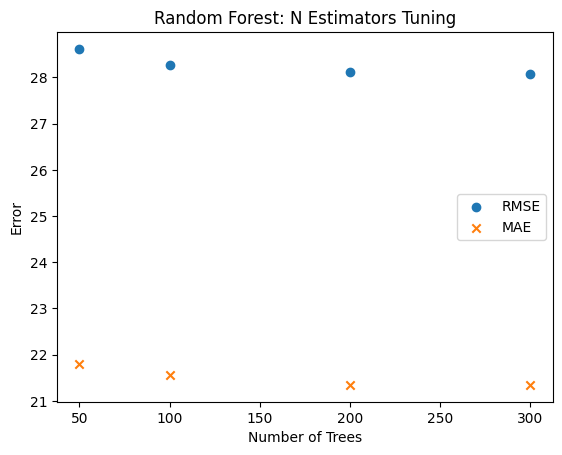

In [ ]:
# plot results
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('RMSE', color='tab:blue')
ax1.scatter(n_values, rmse_n, marker='o', color='tab:blue', label='RMSE')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('R²', color='tab:orange')
ax2.scatter(n_values, r2_n, marker='x', color='tab:orange', label='R²')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Random Forest: N Estimators Tuning')
fig.tight_layout()
plt.show()

I will explore different values of max depth and see results

In [ ]:
depth_values = [None, 10, 20, 30]

rmse_depth = []
r2_depth = []

for d in depth_values:
    model = RandomForestRegressor(max_depth=d, random_state=42)
    rmse_val, r2_val = evaluate_model(model, X, y)
    rmse_depth.append(rmse_val)
    r2_depth.append(r2_val)
    print(f"max_depth={d}: RMSE={rmse_val:.4f}, R²={r2_val:.4f}")

max_depth=None: RMSE=28.2760, MAE=21.5512
max_depth=10: RMSE=28.6603, MAE=22.0223
max_depth=20: RMSE=28.2800, MAE=21.5504
max_depth=30: RMSE=28.2760, MAE=21.5512


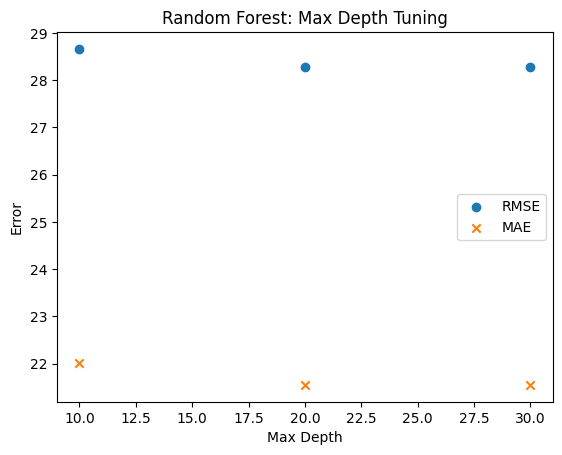

In [ ]:
# plot results

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Max Depth')
ax1.set_ylabel('RMSE', color='tab:blue')
ax1.scatter(depth_values, rmse_depth, marker='o', color='tab:blue', label='RMSE')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('R²', color='tab:orange')
ax2.scatter(depth_values, r2_depth, marker='x', color='tab:orange', label='R²')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Random Forest: Max Depth Tuning')
fig.tight_layout()
plt.show()

Now I will explore tuning both hyperparameters

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, scoring="neg_mean_squared_error", cv=10)

grid_rf.fit(X, y)

print(f"Best Parameters: {grid_rf.best_params_}")
print(f"Best RMSE: {np.sqrt(-grid_rf.best_score_):.4f}")

Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Best RMSE: 45.7994


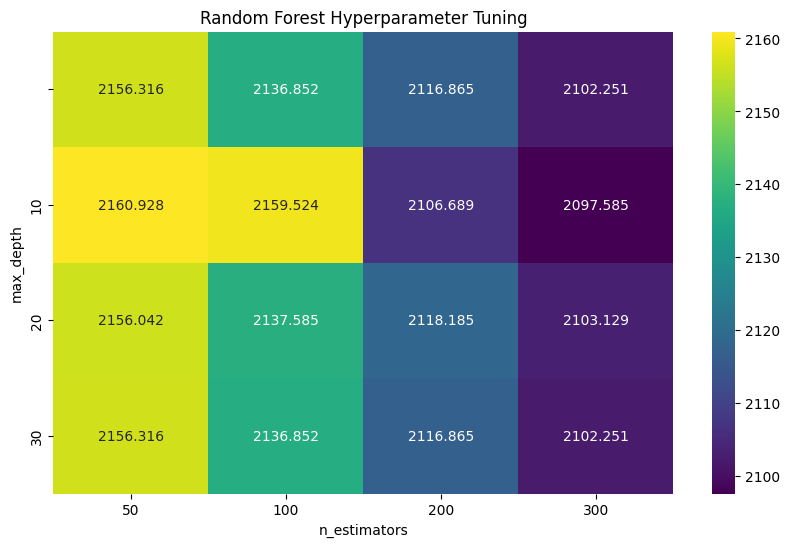

In [24]:
# plot results
import seaborn as sns
results = grid_rf.cv_results_
mean_test_scores = results['mean_test_score']
mean_test_scores = mean_test_scores.reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))
plt.figure(figsize=(10, 6))
sns.heatmap(-mean_test_scores, annot=True, fmt=".3f", xticklabels=param_grid['n_estimators'], yticklabels=param_grid['max_depth'], cmap="viridis")
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('Random Forest Hyperparameter Tuning')
plt.show()